In [219]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
from  scipy.stats import circmean, circstd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


In [230]:
PATH = '/Volumes/home/Research/STEP/02_Station_result_csv'
SAVEpath = '/Volumes/home/Research/STEP/09_histogram_stat'
Class_west=['BCA','ABST','TKBL','AMBR','URAV','ONI']
Class_lesser=['BKRG','BURN','BRNG','AKH','GANZ','BGD','AZMN','BAUR','DMNI','TRLT','TRLG','KZRT','MAGY','ALAV','NAVR','QZX','TBLG']
Class_am=['SHEN','ZARN','VAND','BYUR','ARZA','GNI','GERK','LICH','TSAP','TASB']
Class_far=['GUDA','GUDG','DDFL','LGD','GANJ']
Class = {'West':Class_west,
            'Lesser': Class_lesser,
            'AM': Class_am,
            'Far': Class_far}


In [215]:
def Calc_rho(RCdt, SCdt):
    rho = RCdt/SCdt 
    return rho
def Calc_Phi(RCPhi, SCPhi):
    Phi = max (abs(RCPhi-SCPhi), abs(SCPhi-RCPhi))
    if Phi > 90: Phi = 180 - Phi
    return Phi

In [217]:
for key in Class.keys():
    locals()[f'df_{key}'] = {'station':[],'RCphi':[],'RCdt':[],'SCphi':[],'SCdt':[],'Null':[],'Quality':[]}
    for sta in Class[key]:
#         print('='*50)
        for csvpath in glob.glob(f'{PATH}/*SKS/*{sta}*csv'):
            df = pd.read_csv(csvpath)
            df = df[df['Pick']==True][df['SNRQ']>=5]
            for i in range(len(df)):
                RCPhi = df['RCPhi'].values[i]
                RCDPhi  = df['RCPhi_std'].values[i]
                RCdt  = df['RCdt'].values[i]
                RCDdt  = df['RCdt_std'].values[i]
                SCPhi = df['SCPhi'].values[i]
                SCDPhi  = df['SCPhi_std'].values[i]
                SCdt  = df['SCdt'].values[i]
                SCDdt  = df['SCdt_std'].values[i]

                rho = Calc_rho(RCdt, SCdt)
                phi = Calc_Phi(RCPhi, SCPhi)
                if 25 < phi < 68 or df["CpH"].values[i] > 0.76 :
                    Null = True
                    if df["CpH"].values[i] >= 0.90:
                        Quality = 'Good'
                    else: Quality = 'Fair'
                elif 0.8 < rho < 1.1 and phi < 8:## non-null good condition 
                    Null = False
                    Quality = 'Good'
                elif 0.7 <= rho < 1.2 and phi <= 25: ## non-null FAIR condition 
                    Null = False
                    Quality = 'Fair'
                else: 
                    Null = False
                    Quality = 'Poor'
                locals()[f'df_{key}']['station'].append(sta)    
                locals()[f'df_{key}']['RCphi'].append(RCPhi)
                locals()[f'df_{key}']['RCdt'].append(RCdt)
                locals()[f'df_{key}']['SCphi'].append(SCPhi)
                locals()[f'df_{key}']['SCdt'].append(SCdt)
                locals()[f'df_{key}']['Null'].append(Null)
                locals()[f'df_{key}']['Quality'].append(Quality)
    locals()[f'df_{key}'] = pd.DataFrame(locals()[f'df_{key}'])

/var/folders/sp/pnngww1n0q31w2plgbk53rc00000gn/T/ipykernel_86383/886881342.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['Pick']==True][df['SNRQ']>=5]


qwqwq


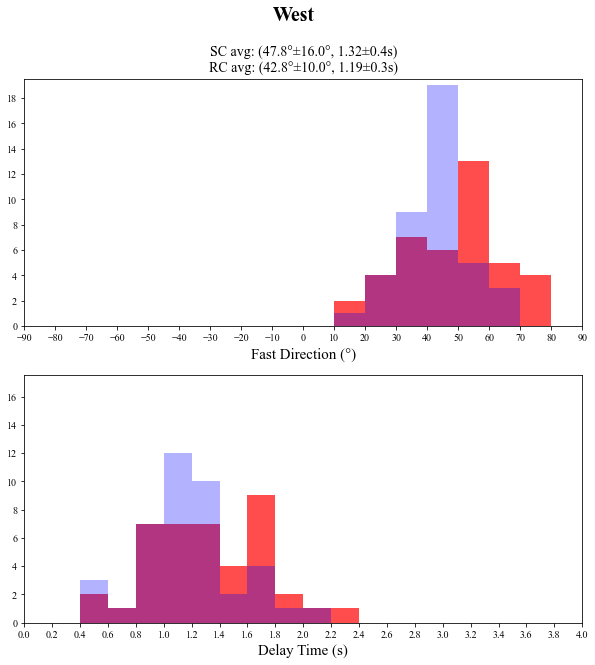

qwqwq


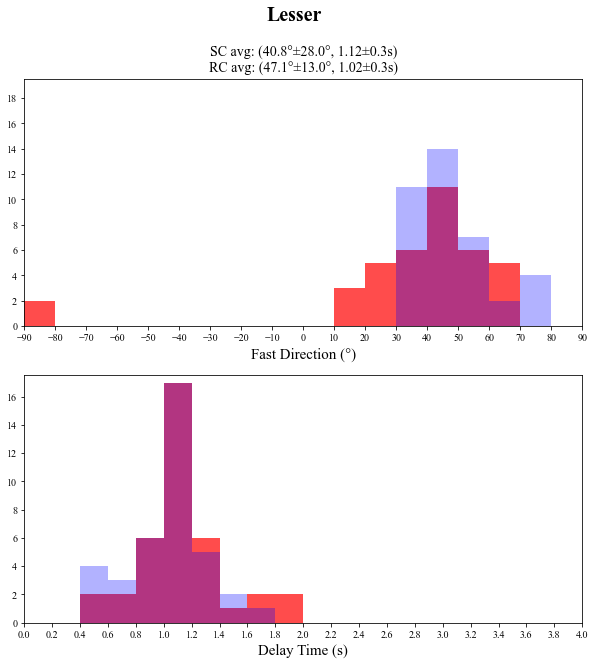

ewewewewew


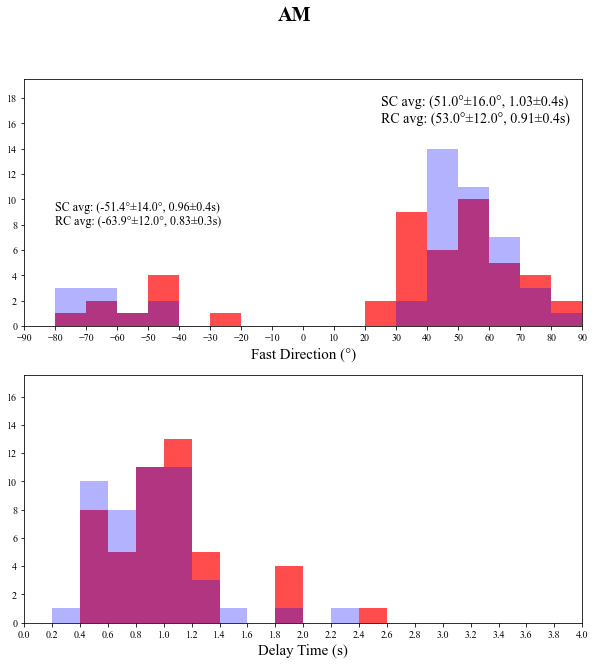

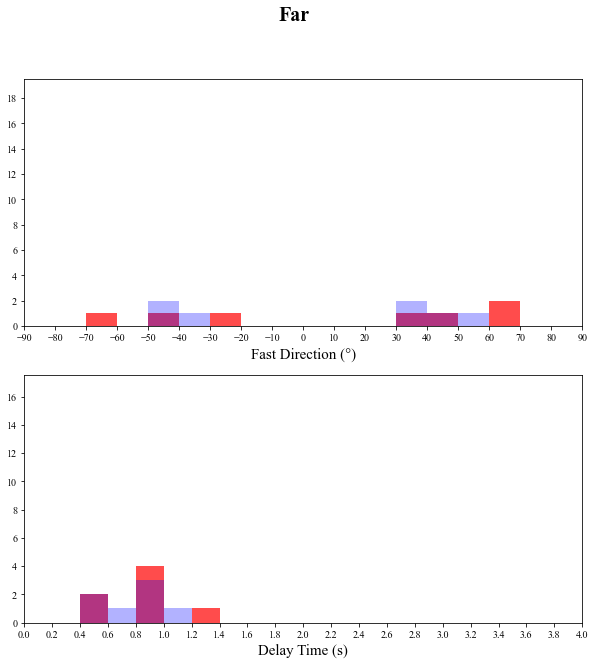

In [236]:
plt.rc('font',family='Times New Roman')
bin_phi=np.arange(-90,90+1,10)
bin_dt=np.arange(0,4+0.1,0.2)
for key in Class.keys():
    plt.figure(figsize=(10,10))
    newdf = locals()[f'df_{key}'][locals()[f'df_{key}']['Null']==False]
    newdf = newdf[newdf['Quality']!='Poor']

    ax1 = plt.subplot(211)
    nS,binsS,jR=plt.hist(newdf['SCphi'],bins=bin_phi, width=10, alpha=0.7,color='red')
    nR,binsS,jR=plt.hist(newdf['RCphi'],bins=bin_phi, width=10, alpha=0.3,color='blue')
    plt.xlim(-90,90)
    plt.ylim(0,19.5)
    plt.xlabel('Fast Direction (°)',fontsize=15)
    ax1.xaxis.set_major_locator(MultipleLocator(10))
    ax1.yaxis.set_major_locator(MultipleLocator(2))
    ax2 = plt.subplot(212)
    plt.hist(newdf['SCdt'],bins=bin_dt, width=0.2, alpha=0.7,color='red')
    plt.hist(newdf['RCdt'],bins=bin_dt, width=0.2, alpha=0.3,color='blue')
    plt.xlim(0,4)
    plt.ylim(0,17.5)
    plt.xlabel('Delay Time (s)',fontsize=15)
    ax2.xaxis.set_major_locator(MultipleLocator(0.2))
    ax2.yaxis.set_major_locator(MultipleLocator(2))

    if key == 'West' or key == 'Lesser':
        print('qwqwq')
        avg_angle_SC = circmean(newdf['SCphi']*np.pi/180)*180/np.pi
        avg_angle_RC = circmean(newdf['RCphi']*np.pi/180)*180/np.pi
        std_angle_SC = circstd(newdf['SCphi']*np.pi/180)*180/np.pi
        std_angle_RC = circstd(newdf['RCphi']*np.pi/180)*180/np.pi
        avg_dt_SC = np.mean(newdf['SCdt'])
        avg_dt_RC = np.mean(newdf['RCdt']) 
        std_dt_SC = np.std(newdf['SCdt'])
        std_dt_RC = np.std(newdf['RCdt']) 
        plt.subplot(211)
        plt.title(f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',fontsize=14)
    elif key == 'AM':
        print('ewewewewew')
        caldf = newdf[newdf['SCphi']>0]
        avg_angle_SC = circmean(caldf['SCphi']*np.pi/180)*180/np.pi
        avg_angle_RC = circmean(caldf['RCphi']*np.pi/180)*180/np.pi
        std_angle_SC = circstd(caldf['SCphi']*np.pi/180)*180/np.pi
        std_angle_RC = circstd(caldf['RCphi']*np.pi/180)*180/np.pi   
        avg_dt_SC = np.mean(caldf['SCdt'])
        avg_dt_RC = np.mean(caldf['RCdt']) 
        std_dt_SC = np.std(caldf['SCdt'])
        std_dt_RC = np.std(caldf['RCdt']) 
        plt.subplot(211)
        plt.text(x=25,y=16,s=f'SC avg: ({round(avg_angle_SC,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',fontsize=14)            

        caldf_ = newdf[newdf['SCphi']<0]
        avg_angle_SC = circmean(caldf_['SCphi']*np.pi/180)*180/np.pi
        avg_angle_RC = circmean(caldf_['RCphi']*np.pi/180)*180/np.pi
        std_angle_SC = circstd(caldf_['SCphi']*np.pi/180)*180/np.pi
        std_angle_RC = circstd(caldf_['RCphi']*np.pi/180)*180/np.pi            
        avg_dt_SC = np.mean(caldf_['SCdt'])
        avg_dt_RC = np.mean(caldf_['RCdt']) 
        std_dt_SC = np.std(caldf_['SCdt'])
        std_dt_RC = np.std(caldf_['RCdt'])  
        plt.text(x=-80,y=8,s=f'SC avg: ({round(avg_angle_SC-360,1)}°±{round(std_angle_SC,0)}°, {round(avg_dt_SC,2)}±{round(std_dt_SC,1)}s)\nRC avg: ({round(avg_angle_RC-360,1)}°±{round(std_angle_RC,0)}°, {round(avg_dt_RC,2)}±{round(std_dt_RC,1)}s)',ha='left',fontsize=12)

    plt.suptitle(key,fontsize=20,fontweight='bold')
#     plt.savefig(f'{SAVEpath}/Histogram_{key}.png',dpi=150,bbox_inches='tight',facecolor='white')
#     plt.savefig(f'{SAVEpath}/Histogram_{key}.pdf')
    plt.show()
    plt.close()